In [117]:
import pandas as pd
import numpy as np

In [118]:
df=pd.read_csv("C:\\Users\\apadh\\OneDrive\\Desktop\\ml_journey\\exam\\daily_water_intake\\Daily_Water_Intake.csv")

In [119]:
df.head(3)

,Age,Gender,Weight (kg),Daily Water Intake (liters),Physical Activity Level,Weather,Hydration Level
0,56,Male,96,4.23,Moderate,Hot,Good
1,60,Male,105,3.95,High,Normal,Good
2,36,Male,68,2.39,Moderate,Cold,Good


In [120]:
df.tail(3)

,Age,Gender,Weight (kg),Daily Water Intake (liters),Physical Activity Level,Weather,Hydration Level
29997,56,Female,54,1.50,Moderate,Cold,Poor
29998,36,Male,106,4.00,Low,Hot,Good
29999,26,Female,98,4.43,Moderate,Hot,Good


In [121]:
df.shape

(30000, 7)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          30000 non-null  int64  
 1   Gender                       30000 non-null  object 
 2   Weight (kg)                  30000 non-null  int64  
 3   Daily Water Intake (liters)  30000 non-null  float64
 4   Physical Activity Level      30000 non-null  object 
 5   Weather                      30000 non-null  object 
 6   Hydration Level              30000 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 1.6+ MB


In [123]:
df.isnull().sum()

Age                            0
Gender                         0
Weight (kg)                    0
Daily Water Intake (liters)    0
Physical Activity Level        0
Weather                        0
Hydration Level                0
dtype: int64

In [124]:
df.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Daily Water Intake (liters)',
       'Physical Activity Level', 'Weather', 'Hydration Level'],
      dtype='object')

In [125]:
df["Hydration Level"].value_counts()

Hydration Level
Good    23915
Poor     6085
Name: count, dtype: int64

In [126]:
df[df.duplicated]

,Age,Gender,Weight (kg),Daily Water Intake (liters),Physical Activity Level,Weather,Hydration Level
1691,32,Female,46,1.50,Low,Cold,Good
3695,26,Female,53,1.50,Moderate,Cold,Poor
3974,53,Male,61,1.50,Low,Cold,Poor
4250,56,Female,50,2.99,High,Hot,Good
4325,43,Female,52,1.50,Low,Cold,Poor
...,...,...,...,...,...,...,...
29867,34,Female,53,1.50,Low,Cold,Poor
29870,64,Male,62,1.50,Low,Cold,Poor
29893,33,Female,45,1.50,Moderate,Cold,Good
29898,67,Male,68,1.81,Moderate,Normal,Poor


In [127]:
df = df.drop_duplicates()

# X and Y Spliting

In [128]:
X=df.iloc[:,:-1]

In [129]:
X

,Age,Gender,Weight (kg),Daily Water Intake (liters),Physical Activity Level,Weather
0,56,Male,96,4.23,Moderate,Hot
1,60,Male,105,3.95,High,Normal
2,36,Male,68,2.39,Moderate,Cold
3,19,Female,74,3.13,Moderate,Hot
4,38,Male,77,2.11,Low,Normal
...,...,...,...,...,...,...
29995,47,Male,97,3.45,Moderate,Cold
29996,49,Female,109,5.32,High,Hot
29997,56,Female,54,1.50,Moderate,Cold
29998,36,Male,106,4.00,Low,Hot


In [130]:
Y=df.iloc[:,-1]

In [131]:
Y

0        Good
1        Good
2        Good
3        Good
4        Poor
         ... 
29995    Good
29996    Good
29997    Poor
29998    Good
29999    Good
Name: Hydration Level, Length: 29662, dtype: object

# one hot encoding

In [132]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer([("encoder",OneHotEncoder(),("Gender","Physical Activity Level","Weather"))],remainder="passthrough")
X=pd.DataFrame(ct.fit_transform(X))

In [133]:
X

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,56.0,96.0,4.23
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,60.0,105.0,3.95
2,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,36.0,68.0,2.39
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,19.0,74.0,3.13
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,38.0,77.0,2.11
...,...,...,...,...,...,...,...,...,...,...,...
29657,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,47.0,97.0,3.45
29658,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,49.0,109.0,5.32
29659,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,56.0,54.0,1.50
29660,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,36.0,106.0,4.00


# label encoding

In [134]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(Y)

In [135]:
Y

array([0, 0, 0, ..., 1, 0, 0], shape=(29662,))

# split X and Y into X_train,X_test,Y_train,Y_test


In [136]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=4)

# feature scaling

In [137]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Applying smote 

In [138]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
x_train_smote,y_train_smote=sm.fit_resample(X_train,Y_train)

# selecting algorithm : KNN

In [139]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
y_pred=knn.predict(X_test)


In [140]:
y_pred

array([1, 0, 0, ..., 1, 0, 0], shape=(5933,))

# measuring accuracy_score, f1_score,precision_score,recall_score

In [141]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
print("accuracy_score",accuracy_score(y_pred,Y_test)*100)
print("f1 score",f1_score(y_pred,Y_test)*100)
print("precision",precision_score(y_pred,Y_test)*100)
print("recall",recall_score(y_pred,Y_test)*100)


accuracy_score 97.48862295634586
f1 score 93.65687526607067
precision 94.74590869939708
recall 92.5925925925926


# confusion Matrix

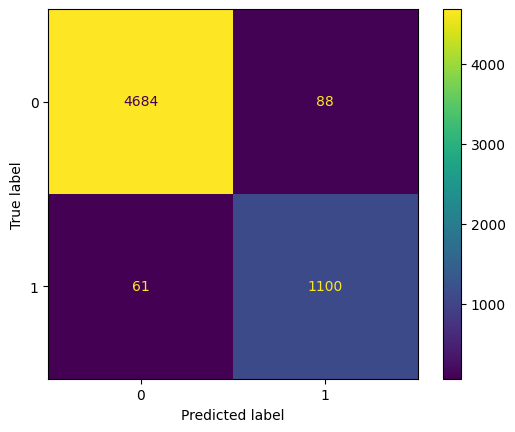

In [142]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(Y_test,y_pred)